<a href="https://colab.research.google.com/github/MNagaHarshithRao/DiamondPricePrediction/blob/main/DiamondPricePredicition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv("diamonds (cleaned).csv")
df.head()

,Shape,Cut,Color,Clarity,Carat Weight,Length/Width Ratio,Depth %,Table %,Polish,Symmetry,Girdle,Culet,Length,Width,Height,Price,Type,Fluorescence
0,Cushion Modified,Ideal,F,VVS2,1.84,1.02,65.8,59.0,Excellent,Very Good,Medium to Thick,NaN,7.09,6.95,4.57,2640,GIA Lab-Grown,NaN
1,Pear,NaN,E,VS1,1.20,1.65,62.5,58.0,Very Good,Very Good,Medium to Thick,NaN,9.64,5.86,3.66,1070,GIA Lab-Grown,NaN
2,Oval,NaN,E,VS1,1.19,1.41,63.1,63.0,Very Good,Very Good,Medium to Thick,NaN,8.44,6.00,3.79,1070,GIA Lab-Grown,NaN
3,Heart,NaN,D,IF,1.00,1.18,61.7,58.0,Excellent,Excellent,Slightly Thick to Very Thick,NaN,5.85,6.89,4.25,7110,GIA,Faint
4,Radiant,NaN,H,VS1,1.01,1.35,69.4,66.0,Excellent,Very Good,Thick,NaN,6.80,5.05,3.50,3050,GIA,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6485 entries, 0 to 6484
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Shape               6480 non-null   object 
 1   Cut                 2182 non-null   object 
 2   Color               6480 non-null   object 
 3   Clarity             6480 non-null   object 
 4   Carat Weight        6480 non-null   float64
 5   Length/Width Ratio  6480 non-null   float64
 6   Depth %             6478 non-null   float64
 7   Table %             6468 non-null   float64
 8   Polish              6465 non-null   object 
 9   Symmetry            6465 non-null   object 
 10  Girdle              6463 non-null   object 
 11  Culet               1891 non-null   object 
 12  Length              6465 non-null   float64
 13  Width               6465 non-null   float64
 14  Height              6465 non-null   float64
 15  Price               6485 non-null   int64  
 16  Type  

In [ ]:
df.describe()

,Carat Weight,Length/Width Ratio,Depth %,Table %,Length,Width,Height,Price
count,6480.000000,6480.000000,6478.000000,6468.000000,6465.000000,6465.000000,6465.000000,6485.000000
mean,1.235772,1.329548,64.206499,61.828541,7.663595,6.098323,3.885708,3529.391365
std,0.506647,0.325707,4.773192,4.760197,1.674665,1.151152,0.599420,3280.439167
min,1.000000,1.000000,46.100000,51.000000,5.180000,4.420000,2.670000,1010.000000
25%,1.010000,1.020000,61.200000,58.000000,6.330000,5.390000,3.460000,1210.000000
50%,1.030000,1.270000,63.100000,61.000000,7.420000,5.640000,3.670000,3320.000000
75%,1.200000,1.510000,67.600000,65.000000,8.660000,6.610000,4.100000,4390.000000
max,9.380000,2.580000,77.000000,78.000000,15.210000,14.880000,8.170000,39460.000000


In [ ]:
df.columns

Index(['Shape', 'Cut', 'Color', 'Clarity', 'Carat Weight',
       'Length/Width Ratio', 'Depth %', 'Table %', 'Polish', 'Symmetry',
       'Girdle', 'Culet', 'Length', 'Width', 'Height', 'Price', 'Type',
       'Fluorescence'],
      dtype='object')

In [ ]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df = df.drop_duplicates()

In [ ]:
for col in df.select_dtypes(include=['number']).columns:
    df[col] = df[col].fillna(df[col].mean())
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].fillna(df[col].mode()[0])

<ipython-input-10-23737b2358fa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].fillna(df[col].mean())
<ipython-input-10-23737b2358fa>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].fillna(df[col].mode()[0])


In [ ]:
df.columns

Index(['shape', 'cut', 'color', 'clarity', 'carat_weight',
       'length/width_ratio', 'depth_%', 'table_%', 'polish', 'symmetry',
       'girdle', 'culet', 'length', 'width', 'height', 'price', 'type',
       'fluorescence'],
      dtype='object')

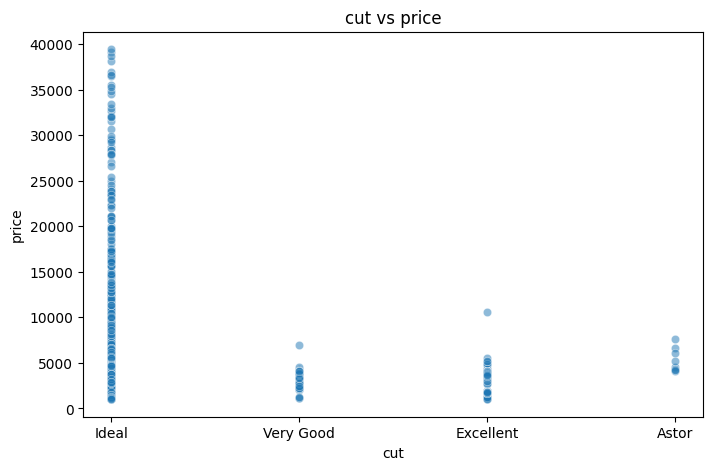

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['cut'], y=df['price'], alpha=0.5)
plt.xlabel("cut")
plt.ylabel("price")
plt.title("cut vs price")
plt.show()

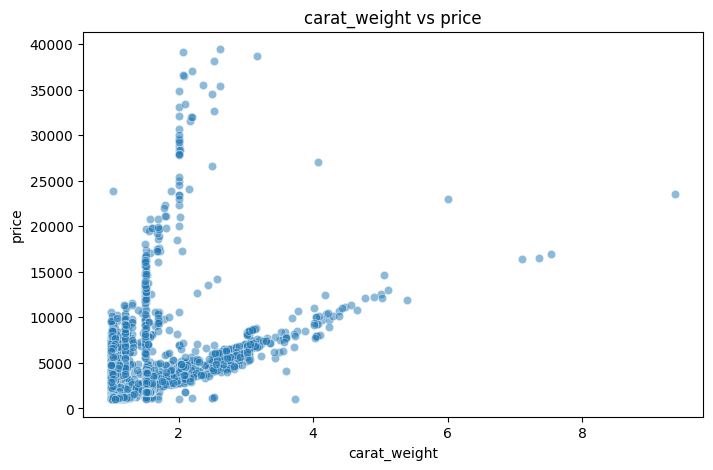

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['carat_weight'], y=df['price'], alpha=0.5)
plt.xlabel("carat_weight")
plt.ylabel("price")
plt.title("carat_weight vs price")
plt.show()

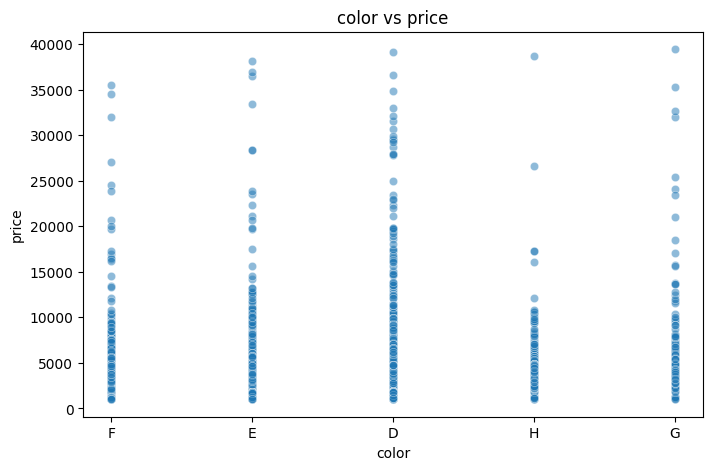

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['color'], y=df['price'], alpha=0.5)
plt.xlabel("color")
plt.ylabel("price")
plt.title("color vs price")
plt.show()


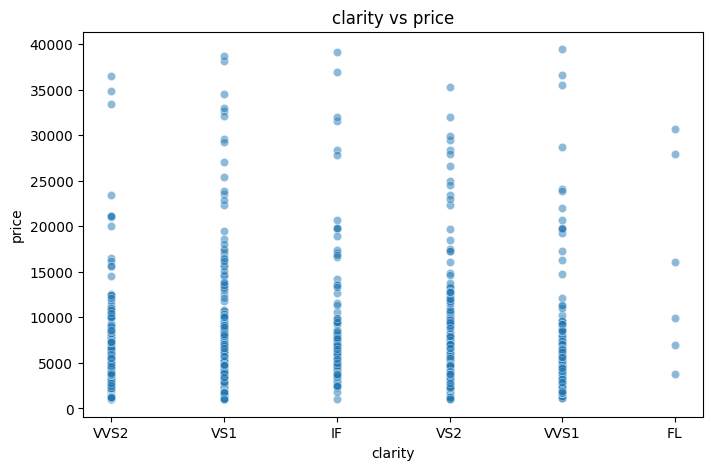

In [ ]:
# price vs. clarity
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['clarity'], y=df['price'], alpha=0.5)
plt.xlabel("clarity")
plt.ylabel("price")
plt.title("clarity vs price")
plt.show()

In [ ]:
# Get unique values in categorical columns
categorical_cols = ['cut', 'color', 'clarity', 'shape', 'polish', 'symmetry', 'girdle', 'fluorescence']
for col in categorical_cols:
    print(f"{col}: {df[col].unique()}")


cut: ['Ideal' 'Very Good' 'Excellent' 'Astor']
color: ['F' 'E' 'D' 'H' 'G']
clarity: ['VVS2' 'VS1' 'IF' 'VS2' 'VVS1' 'FL']
shape: ['Cushion Modified' 'Pear' 'Oval' 'Heart' 'Radiant' 'Marquise' 'Princess'
 'Round' 'Cushion' 'Emerald' 'Square Radiant']
polish: ['Excellent' 'Very Good' 'Good']
symmetry: ['Very Good' 'Excellent' 'Good']
girdle: ['Medium to Thick' 'Slightly Thick to Very Thick' 'Thick'
 'Slightly Thick to Thick' 'Medium to Slightly Thick'
 'Medium to Very Thick' 'Slightly Thick' 'Medium' 'Thick to Very Thick'
 'Very Thick' 'Thin to Medium' 'Thin to Thick' 'Medium to Extremely Thick'
 'Slightly Thick to Extremely Thick' 'Very Thin to Very Thick'
 'Thin to Slightly Thick' 'Thick to Extremely Thick' 'Thin to Very Thick'
 'Slightly Thick to Slightly Thick' 'Very Thin to Thick' 'Thin'
 'Very Thick to Extremely Thick' 'Thin to Extremely Thick'
 'Extremely Thick' 'Extremely Thin to Medium'
 'Very Thin to Extremely Thick' 'Very Thin to Slightly Thick'
 'Extremely Thin to Extremely 

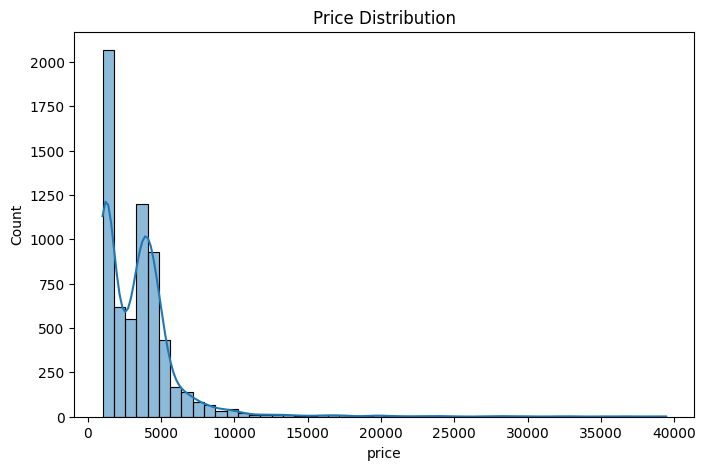

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.histplot(df['price'], bins=50, kde=True)
plt.xlabel("price")
plt.title("Price Distribution")
plt.show()


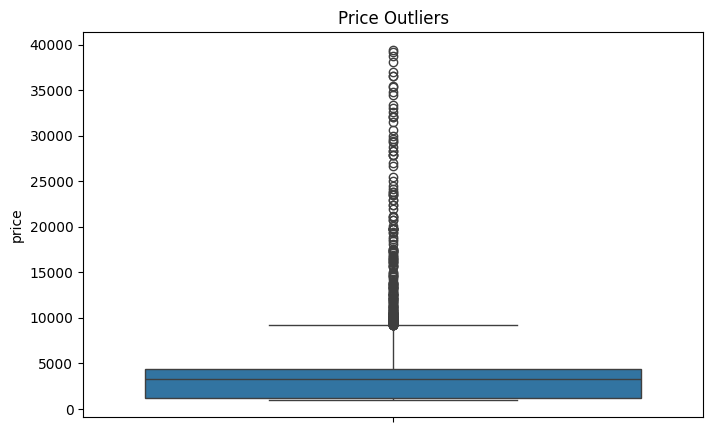

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(y=df["price"])
plt.title("Price Outliers")
plt.show()


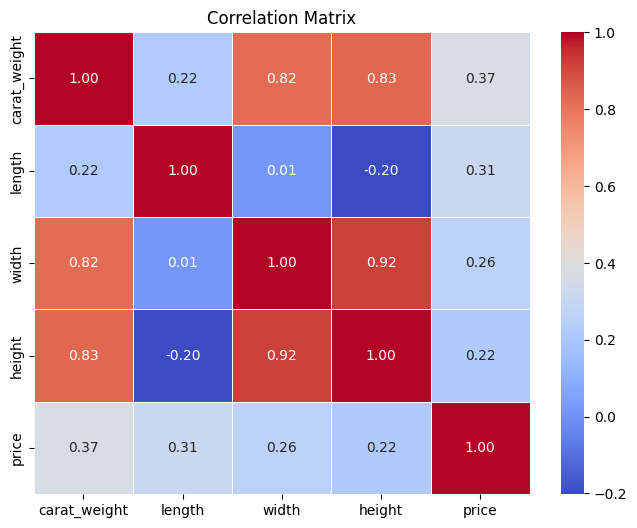

In [ ]:
import numpy as np

# Compute correlation matrix
corr_matrix = df[['carat_weight',  'length', 'width', 'height', 'price']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


In [ ]:

print(df.dtypes)

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_cols)


shape                  object
cut                    object
color                  object
clarity                object
carat_weight          float64
length/width_ratio    float64
depth_%               float64
table_%               float64
polish                 object
symmetry               object
girdle                 object
culet                  object
length                float64
width                 float64
height                float64
price                   int64
type                   object
fluorescence           object
dtype: object
Categorical Columns: Index(['shape', 'cut', 'color', 'clarity', 'polish', 'symmetry', 'girdle',
       'culet', 'type', 'fluorescence'],
      dtype='object')


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Apply Label Encoding
df['cut'] = le.fit_transform(df['cut'])
df['color'] = le.fit_transform(df['color'])
df['clarity'] = le.fit_transform(df['clarity'])
df['shape'] = le.fit_transform(df['shape'])
df['polish'] = le.fit_transform(df['polish'])
df['symmetry'] = le.fit_transform(df['symmetry'])
df['girdle'] = le.fit_transform(df['girdle'])
df['fluorescence'] = le.fit_transform(df['fluorescence'])
df['culet'] = le.fit_transform(df['culet'])
df['type'] = le.fit_transform(df['type'])

# Display first few rows
df.head()


,shape,cut,color,clarity,carat_weight,length/width_ratio,depth_%,table_%,polish,symmetry,girdle,culet,length,width,height,price,type,fluorescence
0,1,2,2,5,1.84,1.02,65.8,59.0,0,2,7,1,7.09,6.95,4.57,2640,1,0
1,6,2,1,2,1.20,1.65,62.5,58.0,2,2,7,1,9.64,5.86,3.66,1070,1,0
2,5,2,1,2,1.19,1.41,63.1,63.0,2,2,7,1,8.44,6.00,3.79,1070,1,0
3,3,2,0,1,1.00,1.18,61.7,58.0,0,0,13,1,5.85,6.89,4.25,7110,0,0
4,8,2,4,2,1.01,1.35,69.4,66.0,0,2,14,1,6.80,5.05,3.50,3050,0,0


In [ ]:
from sklearn.model_selection import train_test_split

# Define target variable (Price)
X = df.drop(columns=['price'])  # Features
y = df['price']  # Target Variable

# Split the data (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (5185, 17)
Testing set shape: (1297, 17)


In [ ]:
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)



In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

print(f"R² Score: {r2_score(y_test, y_pred_xgb)}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_xgb)}")


R² Score: 0.8593573570251465
MAE: 404.664306640625


In [ ]:
from sklearn.metrics import mean_squared_error

# Compute Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred_xgb)
print(f"Mean Squared Error (MSE): {mse}")

# Compute Root Mean Squared Error (RMSE)
rmse = mse ** 0.5
print(f"Root Mean Squared Error (RMSE): {rmse}")


Mean Squared Error (MSE): 1434526.875
Root Mean Squared Error (RMSE): 1197.7173602315365


In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred_xgb) * 100
print(f"Model Accuracy (R² Score in %): {r2:.2f}%")


Model Accuracy (R² Score in %): 85.94%


In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Optimized XGBoost Model
xgb = XGBRegressor(
    n_estimators=300,       # More trees for better learning
    learning_rate=0.05,     # Lower learning rate for stability
    max_depth=7,            # More depth to capture complex patterns
    subsample=0.8,          # Use 80% of data per tree (prevents overfitting)
    colsample_bytree=0.8,   # Use 80% of features per tree
    gamma=0,                # Regularization parameter
    reg_alpha=0.1,          # L1 regularization (helps reduce overfitting)
    reg_lambda=1,           # L2 regularization
    random_state=42
)

# Train Model
xgb.fit(X_train, y_train)

# Make Predictions
y_pred_xgb = xgb.predict(X_test)

# Evaluate Model
r2 = r2_score(y_test, y_pred_xgb) * 100  # Convert to percentage
mae = mean_absolute_error(y_test, y_pred_xgb)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb))

print(f"✅ R² Score (Accuracy): {r2:.2f}%")
print(f"✅ Mean Absolute Error (MAE): {mae:.2f}")
print(f"✅ Root Mean Squared Error (RMSE): {rmse:.2f}")


✅ R² Score (Accuracy): 86.26%
✅ Mean Absolute Error (MAE): 403.82
✅ Root Mean Squared Error (RMSE): 1183.75
